## Numerical Examples: Basis for Grayscale Images (Python) Help Center 

The goal of this example is to illustrate the theoretical concepts studied in class (vector space, scalar product, basis and approximation) with a specific class of signals, grayscale images. Consider the following grayscale image of size 64 by 64 pixels.

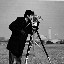

In [1]:
from IPython.display import Image
Image(filename='D:/TrabajoSwIng/Python/IPython Notebooks/DSPNumex_EPFL/NumEx3/Num_Ex_3/camera_blurred.jpg')

It is represented by a square $64\times64$ matrix $I$, where each element corresponds to the intensity of a pixel. The matrix $I$ is determined from the image using the imread function.

In [2]:
%pylab inline
import matplotlib.pylab as pylb
import numpy as np
I = np.array(pylb.imread('D:/TrabajoSwIng/Python/IPython Notebooks/DSPNumex_EPFL/NumEx3/Num_Ex_3/camera_blurred.jpg'), dtype=float64)

Populating the interactive namespace from numpy and matplotlib


For example, the first column of this image is a $64\times1$ vector

In [3]:
I[:,0]

array([ 156.,  157.,  157.,  152.,  154.,  155.,  151.,  157.,  152.,
        155.,  158.,  159.,  159.,  160.,  160.,  161.,  155.,  160.,
        161.,  161.,  164.,  162.,  160.,  162.,  158.,  160.,  158.,
        157.,  160.,  160.,  159.,  158.,  163.,  162.,  162.,  157.,
        160.,  114.,  114.,  103.,   88.,   62.,  109.,   82.,  108.,
        128.,  138.,  140.,  136.,  128.,  122.,  137.,  147.,  114.,
        114.,  144.,  112.,  115.,  117.,  131.,  112.,  141.,   99.,   97.])

Conversely, one can display the array as an image by using the pylab.imshow function from matplotlib

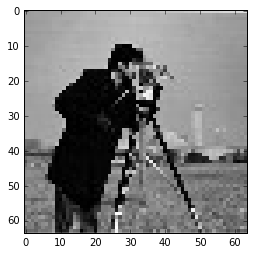

In [4]:
import matplotlib.pylab as plt
plt.imshow(I, cmap=plt.cm.gray, interpolation='none')  #The cmap=plt.cm.gray renders the image in gray
plt.show()

We can define two operations on this class of signals, the addition and multiplication by a scalar. The addition of two images is defined like the standard matrix addition, whilst the multiplication by a scalar is also defined like the corresponding matrix operation.
$I1 + I2 =
\left( \begin{array}{ccc} I1_{1,1} & \dots & I1_{1,64} \\ \vdots & & \vdots \\ I1_{64,1} & \dots & I1_{64,64} \end{array} \right) + \left( \begin{array}{ccc} I2_{1,1} & \dots & I2_{1,64} \\ \vdots & & \vdots \\ I2_{64,1} & \dots & I2_{64,64} \end{array} \right)  = \left( \begin{array}{ccc} I1_{1,1} +  I2_{1,1} & \dots & I1_{1,64}  +  I2_{1,64}\\ \vdots & & \vdots \\ I1_{64,1} +  I2_{64,1}& \dots & I1_{64,64} +  I2_{64,64}  \end{array} \right)$

$\alpha I1 =
\alpha \left( \begin{array}{ccc} I1_{1,1} & \dots & I1_{1,64} \\ \vdots & & \vdots \\ I1_{64,1} & \dots & I1_{64,64} \end{array} \right) =
\left( \begin{array}{ccc} \alpha I1_{1,1} & \dots &  \alpha I1_{1,64} \\ \vdots & & \vdots \\ \alpha I1_{64,1} & \dots & \alpha I1_{64,64} \end{array} \right)$

We can verify that the space of 64 by 64 images endowed with these two operations defines an appropriate vector space. We can also endow this vector space with a scalar product defined as

$$\langle I1, I2 \rangle = \sum_{n=1}^{64} \sum_{m=1}^{64} I1_{n, m} I2_{n,m}$$

Observe that this definition of the scalar product corresponds to the ubiquitous one in $\mathbb{R}^{4096}$. This result is obtained by stacking the columns of the $64\times64$ matrix in a $64∗64=4096×1$ vector.

A natural (canonical) basis for this space is formed by the set of matrices where only one element equals to one and all the others equal 0. The following table represents these basis vectors. Of course, it is cumbersome to enumerate them all. We display the two first ones, $e_1$ and $e_2$, as well as the last one $e_{4096}$. This gives already a good idea. An images for a basis vector would consist of a gray rectangle with a white pixel in the corresponding position (black pixel corresponds to a value of -1, a gray one to 0 and a white one to 1).

$e_1 = \begin{pmatrix} 1 & \cdots & 0 \\ 0 & \cdots & 0 \\ \vdots & & \vdots \\ 0 & \cdots & 0  \end{pmatrix}$, 
$e_2 = \begin{pmatrix} 0 & \cdots & 0 \\ 1 & \cdots & 0 \\ \vdots & & \vdots \\ 0 & \cdots & 0  \end{pmatrix}$, 
$e_{4096} = \begin{pmatrix} 0 & \cdots & 0 \\ 0 & \cdots & 0 \\ \vdots & & \vdots \\ 0 & \cdots & 1  \end{pmatrix}$

Suppose we would like to transmit this image over a communication channel. At the sender side, the image is projected in the canonical basis and the resulting coefficients are sent. This simply correspond to sending individually the intensity of each pixel. Suppose there is an error during transmission such that only the first half of the coefficients is correctly transmitted. The received images is only an approximation of the original one and the missing pixels are replaced by a 0 correspond to holes in the image (in this case the entire right half)

We can compute the distance between the two images, i.e., the norm of the error.


D:\Sw4Engineering\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


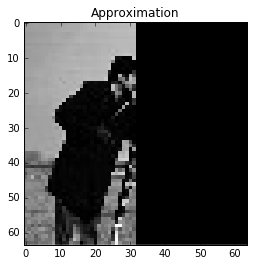

The distance between the original and approximate image is:  6586.036972261847


In [5]:
# Initialization of image
import matplotlib.pylab as plt
I_approx = np.array(plt.imread('D:/TrabajoSwIng/Python/IPython Notebooks/DSPNumex_EPFL/NumEx3/Num_Ex_3/camera_blurred.jpg'), dtype=float64)

I_approx[:,I_approx.shape[1]/2:] = 0  # Half of image is eliminated

plt.imshow(I_approx, cmap=plt.cm.gray, interpolation='none')
plt.title('Approximation')
plt.show()

import math as m
# Error calculation
error = I - I_approx
distance = m.sqrt(sum(sum(error*error)))
print('The distance between the original and approximate image is: ', distance)

The question is whether we can do better by using another basis than the canonical one. The answer is yes. Consider for example the Haar basis defined by the set of matrices $\Psi=\{\psi_i\}_{N\times N}$. The following table represents the first fours basis vectors $\psi_1,…,\psi_4$. The corresponding image is not a single pixel anymore...

$\psi_1 = \begin{pmatrix} 1 & \cdots & 1 \\ \vdots & & \vdots \\ 1 & \cdots & 1 \end{pmatrix}$, 
$\psi_2 = \begin{pmatrix}  1 & \ldots & 1 & -1 & \cdots & -1 \\  \vdots & & \vdots & \vdots & & \vdots \\ 1 & \cdots & 1 & -1 & \cdots & -1  \end{pmatrix}$, 
$\psi_3 = \begin{pmatrix}  1 & \ldots & 1 & -1 & \cdots & -1 & 0 & \cdots & \cdots & 0 \\  \vdots & & \vdots & \vdots & & \vdots & \vdots & & & \vdots \\ 1 & \cdots & 1 & -1 & \cdots & -1 & 0 & \cdots & \cdots & 0  \end{pmatrix}$, 
$\psi_4 = \begin{pmatrix}  0& \cdots & \cdots & 0 & 1 & \ldots & 1 & -1 & \cdots & -1 \\  \vdots & & & \vdots & \vdots & & \vdots & \vdots & & \vdots \\ 0 & \cdots & \cdots & 0 & 1 & \cdots & 1 & -1 & \cdots & -1  \end{pmatrix}$

Observe that Haar basis is composed of the scaled and shifted version of the same signal

$\psi(t) = \begin{cases} 1 \ \rm{if  } \; 0 \leq t \lt 1/2 \\ -1 \ \rm{if  } \; 1/2 \leq t \leq 1 \\ 0 \  \rm{otherwise}   \end{cases}$

As before we project the image onto this basis and send the coefficients over a communication channel that looses the second half of the coefficients. This is implemented in the following code.


In [6]:
def haar(N): 
    #Assuming N is a power of 2
    import numpy as np
    import math as m
    import scipy as sc
    h = np.zeros((N,N), dtype = float)  # Initialize basis matrix
    h[0] = np.ones(N)/m.sqrt(N)         
    
    for k in range(1,N) :       
        p = sc.fix(m.log(k)/m.log(2))
        q = float(k - pow(2,p))
        k1 = float(pow(2,p))
        t1 = float(N / k1)
        k2 = float(pow(2,p+1))
        t2 = float(N / k2)
        
        for i in range(1,int(sc.fix(t2))+1):
            h[k,i+q*t1-1] = pow(2,(p/2))/m.sqrt(N)
            h[k,i+q*t1+t2-1] = -pow(2,(p/2))/m.sqrt(N)
        
    return h

#Load image    
import numpy as np 
import matplotlib.pylab as plt
I = np.array(plt.imread('D:/TrabajoSwIng/Python/IPython Notebooks/DSPNumex_EPFL/NumEx3/Num_Ex_3/camera_blurred.jpg'), dtype='float64')
size = I.shape 

I = I.flatten()       #Arrange image in column vector
H = haar(4096)        #Generate Haar basis vector (rows of H) H is a 4096x4096 matrix
    
I_Haar = np.dot(H,I)           #Project image on the new basis
    
I_Haar[2048 : 4095] = 0        #Remove the second half of the coefficient

I_Haar = np.dot(H.T,I_Haar)    #Recover the image by inverting change of basis

I_Haar = I_Haar.reshape(size)  #Rearrange pixels of the image

D:\Sw4Engineering\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Sw4Engineering\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In this case, the image recovered at the receiver side looks like

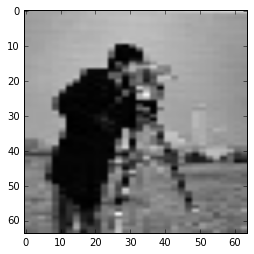

In [7]:
imshow(I_Haar, cmap=plt.cm.gray)
show()

with a distance to the original image of

In [8]:
I = np.array(plt.imread('D:/TrabajoSwIng/Python/IPython Notebooks/DSPNumex_EPFL/NumEx3/Num_Ex_3/camera_blurred.jpg'), dtype='float64')
error_h = I - I_Haar
import math as m
distance = m.sqrt(sum(sum(error_h*error_h)))
print('The distance between the original image and the Haar approximation is ',distance)

The distance between the original image and the Haar approximation is  1319.4676957015658


This happens because the Haar basis decomposes the image into a successive approximation. The first coefficients in the basis correspond to a coarse and smoothed version of the image (low frequency) whereas the subsequent coefficients represent the details in the image (high frequency). Then, in our scenario, we recover a coarser yet complete version of the image.